In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as ma
import seaborn as sns
import statsmodels.api as stat

In [5]:
data = pd.read_csv('problem1.csv')

In [10]:
mean_x = data['x'].mean()
mean_y = data['y'].mean()
print(f"mu_x = {mean_x},mu_y = {mean_y}")

mu_x = -0.14054562796809716,mu_y = -0.022277188035264378


In [11]:
cov = data.cov()
print(cov)
variance_x = cov.loc["x","x"]
variance_y = cov.loc["y","y"]
covariance_xy = cov.loc["x","y"]

          x         y
x  1.315195  0.562908
y  0.562908  0.898883


In [23]:
con_mean = mean_y + (covariance_xy/variance_x)*(data.x - mean_x)
con_variance = variance_y - covariance_xy**2/variance_x

In [14]:
results1 = stat.OLS(data.y, stat.add_constant(data.x)).fit()
ols_mean_y = results1.fittedvalues
ols_variance_y = results1.ssr / (len(data.x)-2)

C:\Users\51069\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


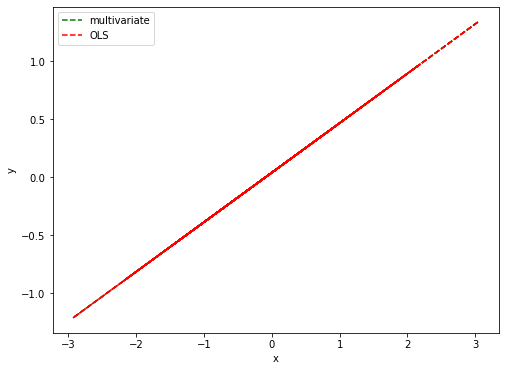

In [21]:
figure, comp = plt.subplots(figsize=(8,6))
comp.plot(data.x, con_mean, 'g--', label="multivariate")
comp.plot(data.x, results1.fittedvalues, 'r--', label="OLS")
comp.set_xlabel('x')
comp.set_ylabel('y')
comp.legend(loc='best')

In [22]:
print(con_variance)
print(ols_variance_y)

0.6579563030192094
0.6646701428459357


# Problem2

In [26]:
import scipy.stats as st
import scipy.optimize as opt

In [70]:
data1 = pd.read_csv("problem2.csv")
results = stat.OLS(data1.y, stat.add_constant(data1.x)).fit()
error = data1.y - results.fittedvalues

In [71]:
s,p = st.shapiro(error)
alpha = 0.1
print(f"t-test statistic = {s}, p = {p}")
if p < alpha:
    print("Reject H0.")
else:
    print("Can't reject H0")

t-test statistic = 0.938385546207428, p = 0.00015389148029498756
Reject H0.


In [72]:
from scipy.stats import norm
from scipy.stats import t
import scipy.optimize as optimize

In [83]:
def log_like_nor(par, y, x):
    e = y - par[0] - par[1]*x
    likelihood = -np.log(norm(0,par[2]).pdf(e)).sum()
    return likelihood
def log_like_t(par, y, x):
    e = y - par[0] - par[1]*x
    likelihood = -np.log(t(df = par[2],scale = par[3]).pdf(e)).sum()
    return likelihood

In [84]:
opt_res_norm = optimize.minimize(fun = log_like_nor, 
                            x0 = [0, 0, 1], 
                            args = (data1.y, data1.x))
opt_res_t = optimize.minimize(fun = log_like_t, 
                            x0 = [0, 0, 10, 1], 
                            args = (data1.y, data1.x))

In [85]:
def cal_SSE(opt_res_t, opt_res_norm, data):
    e_t = data.y - opt_res_t.x[0] - opt_res_t.x[1]*data.x
    e_norm = data.y - opt_res_norm.x[0] - opt_res_norm.x[1]*data.x
    SSE_t = sum(e_t*e_t)
    SSE_norm = sum(e_norm*e_norm)
    return SSE_norm,SSE_t

In [86]:
def cal_AIC(opt_res_t, opt_res_norm, data):
    AIC_t = 2*4 + 2*opt_res_t.fun
    AIC_norm = 2*3 + 2*opt_res_norm.fun
    return AIC_norm, AIC_t

In [87]:
def cal_BIC(opt_res_t, opt_res_norm, data):
    BIC_t = 4*np.log(len(data.y)) + 2*opt_res_t.fun
    BIC_norm = 3*np.log(len(data.y)) + 2*opt_res_norm.fun
    return BIC_norm, BIC_t

In [88]:
SSE_norm,SSE_t = cal_SSE(opt_res_t, opt_res_norm, data1)
AIC_norm,AIC_t = cal_AIC(opt_res_t, opt_res_norm, data1)
BIC_norm,BIC_t = cal_BIC(opt_res_t, opt_res_norm, data1)
print("Distribution,b0,b1,SSE,AIC,BIC")
print(f"Norm, {opt_res_norm.x[0]}, {opt_res_norm.x[1]}, {SSE_norm}, {AIC_norm}, {BIC_norm} ")
print(f"t, {opt_res_t.x[0]}, {opt_res_t.x[1]}, {SSE_t}, {AIC_t}, {BIC_t} ")

Distribution,b0,b1,SSE,AIC,BIC
Norm, 0.11983620432704001, 0.6052048467660482, 143.61484854062613, 325.9841933783247, 333.79970393628895 
t, 0.14261408167008574, 0.5575717648546195, 143.88176185026407, 318.94594082493296, 329.3666215688853 


# Problem3

In [89]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [90]:
def AR_figures(params,titles):
    length = len(params)
    fig, axes = plt.subplots(length,3,figsize = (5*length,3*length))
    for i in range(len(params)):
        process = ArmaProcess(ar = params[i])
        simulated_data = process.generate_sample(nsample=1000)
        axes[i][0].plot(simulated_data)
        axes[i][0].set_title(titles[i])
        fig = plot_acf(simulated_data, alpha=0.1, lags=25, ax=axes[i][1])
        fig = plot_pacf(simulated_data, alpha=0.1, lags=25, ax=axes[i][2])
        
def MA_figures(params,titles):
    length = len(params)
    fig, axes = plt.subplots(length,3,figsize = (5*length,3*length))
    for i in range(len(params)):
        process = ArmaProcess(ma = params[i])
        simulated_data = process.generate_sample(nsample=1000)
        axes[i][0].plot(simulated_data)
        axes[i][0].set_title(titles[i])
        fig = plot_acf(simulated_data, alpha=0.1, lags=25, ax=axes[i][1])
        fig = plot_pacf(simulated_data, alpha=0.1, lags=25, ax=axes[i][2])

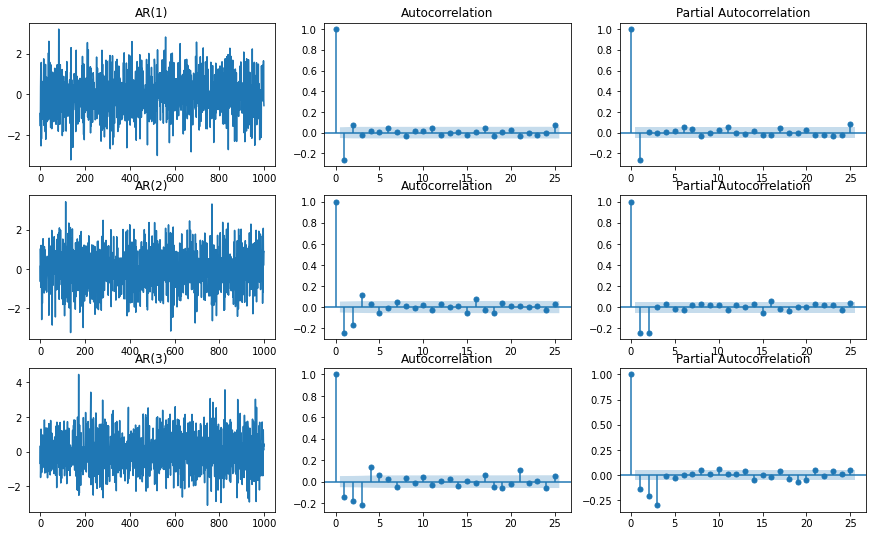

In [92]:
AR_coefs = [[1,0.25],[1,0.25,0.25],[1,0.25,0.25,0.25]]
AR_titles = ["AR(1)","AR(2)","AR(3)"]

AR_figures(AR_coefs, AR_titles)

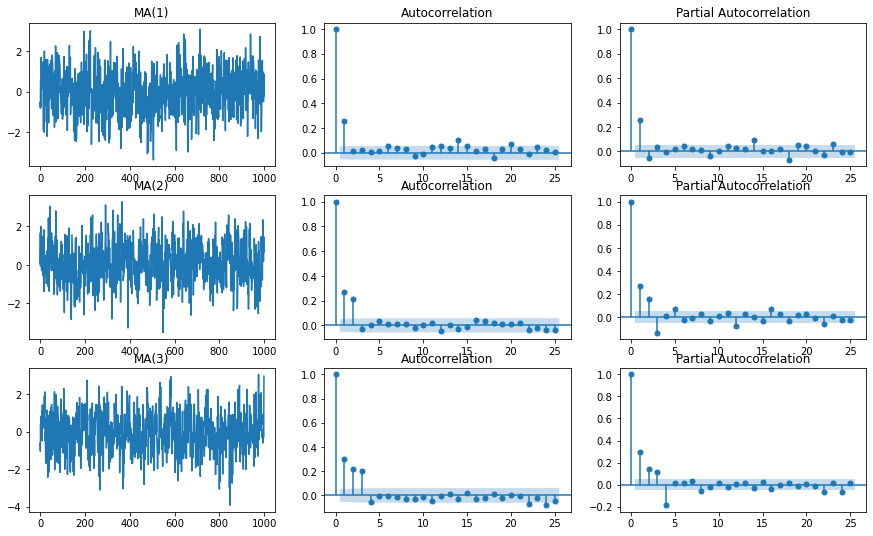

In [93]:
MA_coefs = [[1,0.25],[1,0.25,0.25],[1,0.25,0.25,0.25]]
MA_titles = ["MA(1)","MA(2)","MA(3)"]

MA_figures(MA_coefs, MA_titles)